# Задача 1. Минимизация гладкой функции

$$ f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2) $$

$$ промежуток [1,30]$$

In [69]:
import scipy
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# исходная функция, вычисление значений
def our_func(x):
    return (math.sin(x/5.0))*(math.exp(x/10.0)) + 5*(math.exp(-x/2.0))

In [71]:
# функция простой минимизации
def simple_minimize(x0):
    res = scipy.optimize.minimize(our_func, x0=x0)
    return 'x0 = ' + str(x0) + ' fun = ' + str(res.fun) 

## Внешний вид функции

In [72]:
# исходная функция через numpy для наглядности
def our_func_np(x):
    return (np.sin(x/5.0))*(np.exp(x/10.0)) + 5*(np.exp(-x/2.0))

#### На заданном промежутке - [1,30]

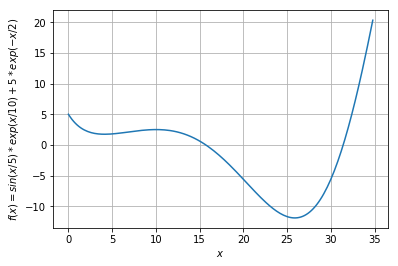

In [73]:
fig = plt.subplots()
x = np.arange(0.0, 35.0, 0.2)
plt.xlabel('$x$') # Метка по оси x в формате TeX
plt.ylabel('$f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$') # Метка по оси y в формате TeX
plt.grid(True) # Сетка
plt.plot(x, our_func_np(x))
plt.show()

### Нахождение минимума, используя стандартные параметры в функции scipy.optimize.minimize

In [74]:
x0 = np.arange(1.0, 30.0, 1.0) # массив потенциальных начальных приближений

In [75]:
print x0

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]


In [76]:
map(simple_minimize, x0)

['x0 = 1.0 fun = 1.74526829033',
 'x0 = 2.0 fun = 1.74526829034',
 'x0 = 3.0 fun = 1.74526829059',
 'x0 = 4.0 fun = 1.74526829041',
 'x0 = 5.0 fun = 1.74526829033',
 'x0 = 6.0 fun = 1.74526829033',
 'x0 = 7.0 fun = 1.74526829033',
 'x0 = 8.0 fun = 1.74526829033',
 'x0 = 9.0 fun = 1.74526829035',
 'x0 = 10.0 fun = 1.74526829034',
 'x0 = 11.0 fun = -11.898894666',
 'x0 = 12.0 fun = -11.898894666',
 'x0 = 13.0 fun = -6371.76522917',
 'x0 = 14.0 fun = -11.898894666',
 'x0 = 15.0 fun = -11.5035807571',
 'x0 = 16.0 fun = -11.898894666',
 'x0 = 17.0 fun = -11.8988946659',
 'x0 = 18.0 fun = -11.898894666',
 'x0 = 19.0 fun = -11.8988946659',
 'x0 = 20.0 fun = -11.898894666',
 'x0 = 21.0 fun = -11.8988946659',
 'x0 = 22.0 fun = -11.898894666',
 'x0 = 23.0 fun = -11.898894666',
 'x0 = 24.0 fun = -11.898894666',
 'x0 = 25.0 fun = -11.898894666',
 'x0 = 26.0 fun = -11.898894666',
 'x0 = 27.0 fun = -11.898894666',
 'x0 = 28.0 fun = -11.898894666',
 'x0 = 29.0 fun = -11.8988946659']

#### Резутат:
Видно, что для различных значений начального приближения можно выделить два локальных минимума.
Заметно также, что чем ближе начальное приближение к точке локального минимума, тем больше вероятность нахождения минимума в текущей области

### Нахождение минимума, используя метод BFGS и начальное приближение x0=2

In [77]:
res_1 = scipy.optimize.minimize(our_func, x0=2, method='BFGS')
print res_1

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])


### Нахождение минимума, используя метод BFGS и начальное приближение x0=30

In [78]:
res_2 = scipy.optimize.minimize(our_func, x0=30, method='BFGS')
print res_2

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])


## Ответ:
$$ x0 = 2$$
$$fun = 1.7452682903447336 $$

$$ x0 = 30$$
$$fun = -11.898894665981313 $$

Данные результаты корректны и соотносятся с графиком исходной функции

#### Запись результатов в файл

In [79]:
with open('task_first_answer.txt', 'w') as func_value:
    func_value.write(str(res_1.fun) + ' ' + str(res_2.fun))